In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [21]:
fashon_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashon_mnist.load_data()

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [23]:
train_images.shape

(60000, 28, 28)

In [24]:
len(train_labels)

60000

In [25]:
test_images.shape

(10000, 28, 28)

In [26]:
len(test_label)

10000

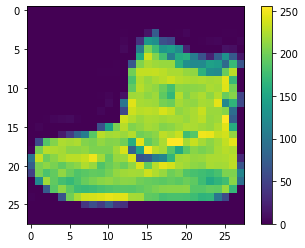

In [27]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [28]:
train_images = train_images / 255.0

test_images = test_images / 255.0

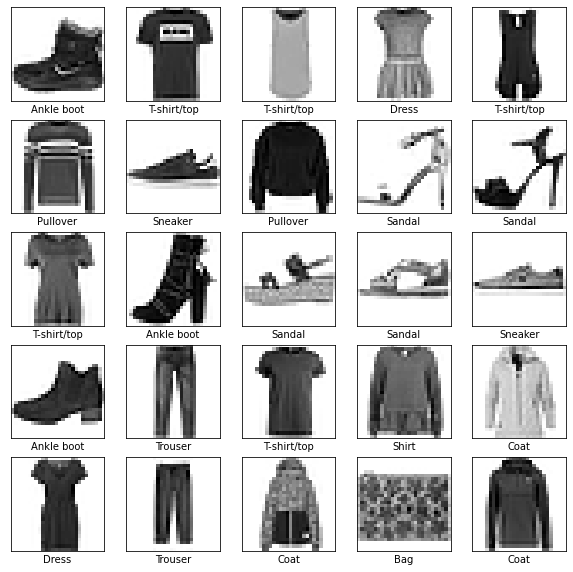

In [29]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [30]:
 model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                              tf.keras.layers.Dense(128, activation = 'relu'),
                              tf.keras.layers.Dense(128, activation = 'relu'),
                              tf.keras.layers.Dense(10)
 ])

In [31]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [32]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4862 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3660 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3293 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3066 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2864 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2723 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2598 - accuracy: 0.9021
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2492 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2370 - accuracy: 0.9102
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.232

In [33]:
test_oss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3506 - accuracy: 0.8769 - 442ms/epoch - 1ms/step

Test accuracy:  0.8769000172615051


In [34]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [35]:
predictions = probability_model.predict(test_images)

In [36]:
predictions[0]

array([1.8306988e-06, 1.9094896e-06, 4.8605892e-07, 7.4219952e-07,
       2.6850711e-07, 2.5539186e-03, 6.7780195e-07, 1.7239388e-02,
       3.7413129e-06, 9.8019707e-01], dtype=float32)

In [37]:
np.argmax(predictions[0])

9

In [38]:
test_labels[0]

9

In [63]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

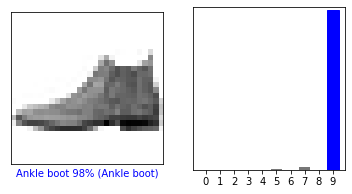

In [64]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

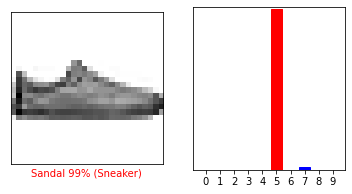

In [65]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

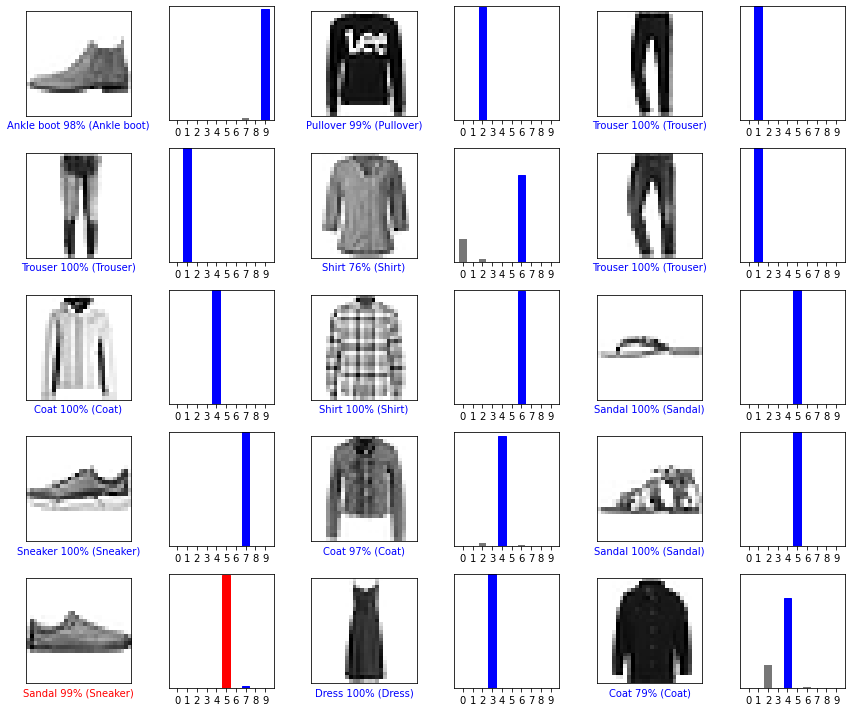

In [70]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [71]:
img = test_images[1]

print(img.shape)

(28, 28)


In [72]:
img = (np.expand_dims(img, 0 ))

print(img.shape)

(1, 28, 28)


In [74]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.9696075e-05 6.2292027e-15 9.9474007e-01 2.9897243e-10 5.1356358e-03
  4.5114628e-13 8.4691419e-05 1.8999519e-15 4.3766359e-11 1.9629950e-14]]


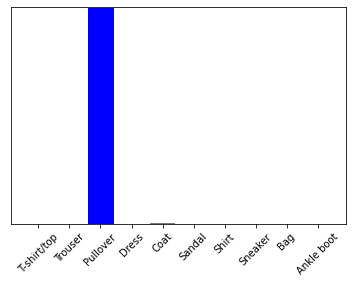

In [75]:
plot_value_array(1, 
                 predictions_single[0], 
                 test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)
plt.show()

In [76]:
np.argmax(predictions_single[0])

2